In [1]:
# #################################################
# ## point_to_point ##
# #################################################
# -- Designed by
# Hamin lee
# -- Produced in June 26, 2020. (Ver.1.0)
# #################################################

In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, savefig

# scientific notation을 사용하지 않는 경우
# pd.options.display.float_format = '{:.4f}'.format

In [3]:
df1 = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-01-btc-krw.csv")   # load csv
df2 = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-02-btc-krw.csv")   # load csv
df3 = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-03-btc-krw.csv")   # load csv
df4 = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-04-btc-krw.csv")   # load csv
df5 = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-05-btc-krw.csv")   # load csv
df6 = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-06-btc-krw.csv")   # load csv
df7 = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-07-btc-krw.csv")   # load csv

In [4]:
## converting timestamp column type 'object' to 'datetime'
df1['timestamp'] = pd.to_datetime(df1['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df2['timestamp'] = pd.to_datetime(df2['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df3['timestamp'] = pd.to_datetime(df3['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df4['timestamp'] = pd.to_datetime(df4['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df5['timestamp'] = pd.to_datetime(df5['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df6['timestamp'] = pd.to_datetime(df6['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df7['timestamp'] = pd.to_datetime(df7['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [5]:
# quantity에 부호 붙이기
for i, row in df1.iterrows(): 
    if row["side"]==0:
        row["quantity"]=-row["quantity"]
    df1.at[i,'sign_quantity'] = row["quantity"]

In [6]:
# quantity에 부호 붙이기
for i, row in df2.iterrows(): 
    if row["side"]==0:
        row["quantity"]=-row["quantity"]
    df2.at[i,'sign_quantity'] = row["quantity"]

In [7]:
# quantity에 부호 붙이기
for i, row in df3.iterrows(): 
    if row["side"]==0:
        row["quantity"]=-row["quantity"]
    df3.at[i,'sign_quantity'] = row["quantity"]

In [8]:
# quantity에 부호 붙이기
for i, row in df4.iterrows(): 
    if row["side"]==0:
        row["quantity"]=-row["quantity"]
    df4.at[i,'sign_quantity'] = row["quantity"]

In [9]:
# quantity에 부호 붙이기
for i, row in df5.iterrows(): 
    if row["side"]==0:
        row["quantity"]=-row["quantity"]
    df5.at[i,'sign_quantity'] = row["quantity"]

In [10]:
# quantity에 부호 붙이기
for i, row in df6.iterrows(): 
    if row["side"]==0:
        row["quantity"]=-row["quantity"]
    df6.at[i,'sign_quantity'] = row["quantity"]

In [11]:
# quantity에 부호 붙이기
for i, row in df7.iterrows(): 
    if row["side"]==0:
        row["quantity"]=-row["quantity"]
    df7.at[i,'sign_quantity'] = row["quantity"]

In [12]:
# timestamp (시간), quantity (거래 코인 양), price (코인 1개 당 가격), fee (??), amount (q * price), side (0:판 것, 1:산 것)
df1

,timestamp,quantity,price,fee,amount,side,sign_quantity
0,2018-01-03 13:44:04,0.161900,20668000,5019.000000,3341130,1,0.161900
1,2018-01-10 22:20:51,0.070594,20777000,0.000106,-1468934,0,-0.070594
2,2018-01-11 23:49:37,0.000999,19563000,0.000002,-19563,0,-0.000999
3,2018-01-18 23:09:41,0.000999,14572000,0.000002,-14572,0,-0.000999
4,2018-01-19 12:23:32,0.072600,14539000,1583.000000,1053948,1,0.072600
...,...,...,...,...,...,...,...
818,2018-01-25 21:47:46,0.001000,12849000,19.000000,12830,1,0.001000
819,2018-01-31 13:54:04,0.000999,11137000,0.000002,-11137,0,-0.000999
820,2018-01-31 13:59:03,0.001000,11105000,17.000000,11088,1,0.001000
821,2018-01-31 14:01:10,0.000999,11125000,0.000002,-11125,0,-0.000999


In [13]:
# sign_quantity 더하기 - sign_quantity_cumsum은 현재 시점 보유한 coin의 quantity
sign_quantity_cumsum1=df1["sign_quantity"].cumsum()
sign_quantity_cumsum2=df2["sign_quantity"].cumsum()
sign_quantity_cumsum3=df3["sign_quantity"].cumsum()
sign_quantity_cumsum4=df4["sign_quantity"].cumsum()
sign_quantity_cumsum5=df5["sign_quantity"].cumsum()
sign_quantity_cumsum6=df6["sign_quantity"].cumsum()
sign_quantity_cumsum7=df7["sign_quantity"].cumsum()

In [14]:
# amount 더하기 - amount_cumsum이 profit임
amount_cumsum1=df1["amount"].cumsum()
amount_cumsum2=df2["amount"].cumsum()
amount_cumsum3=df3["amount"].cumsum()
amount_cumsum4=df4["amount"].cumsum()
amount_cumsum5=df5["amount"].cumsum()
amount_cumsum6=df6["amount"].cumsum()
amount_cumsum7=df7["amount"].cumsum()

In [15]:
# float16 type으로 타입 변경
sign_quantity_cumsum1 = sign_quantity_cumsum1.astype('float16')
sign_quantity_cumsum2 = sign_quantity_cumsum2.astype('float16')
sign_quantity_cumsum3 = sign_quantity_cumsum3.astype('float16')
sign_quantity_cumsum4 = sign_quantity_cumsum4.astype('float16')
sign_quantity_cumsum5 = sign_quantity_cumsum5.astype('float16')
sign_quantity_cumsum6 = sign_quantity_cumsum6.astype('float16')
sign_quantity_cumsum7 = sign_quantity_cumsum7.astype('float16')

In [16]:
# 데이터프레임 df1, sign_quantity_cumsum, amount_cumsum 결합
cumsum_df1 = pd.concat([df1,sign_quantity_cumsum1,amount_cumsum1],axis=1)
cumsum_df2 = pd.concat([df2,sign_quantity_cumsum2,amount_cumsum2],axis=1)
cumsum_df3 = pd.concat([df3,sign_quantity_cumsum3,amount_cumsum3],axis=1)
cumsum_df4 = pd.concat([df4,sign_quantity_cumsum4,amount_cumsum4],axis=1)
cumsum_df5 = pd.concat([df5,sign_quantity_cumsum5,amount_cumsum5],axis=1)
cumsum_df6 = pd.concat([df6,sign_quantity_cumsum6,amount_cumsum6],axis=1)
cumsum_df7 = pd.concat([df7,sign_quantity_cumsum7,amount_cumsum7],axis=1)

In [17]:
# 칼럼 지정
cumsum_df1.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum']
cumsum_df2.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum']
cumsum_df3.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum']
cumsum_df4.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum']
cumsum_df5.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum']
cumsum_df6.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum']
cumsum_df7.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum']

In [18]:
# 소숫점 다섯째 자리에서 자르기
cumsum_df_zero_point1=cumsum_df1[ (cumsum_df1['sign_quantity_cumsum(coin)'] < 0.01) & (cumsum_df1['sign_quantity_cumsum(coin)'] > -0.01)]
cumsum_df_zero_point2=cumsum_df2[ (cumsum_df2['sign_quantity_cumsum(coin)'] < 0.01) & (cumsum_df2['sign_quantity_cumsum(coin)'] > -0.01)]
cumsum_df_zero_point3=cumsum_df3[ (cumsum_df3['sign_quantity_cumsum(coin)'] < 0.01) & (cumsum_df3['sign_quantity_cumsum(coin)'] > -0.01)]
cumsum_df_zero_point4=cumsum_df4[ (cumsum_df4['sign_quantity_cumsum(coin)'] < 0.01) & (cumsum_df4['sign_quantity_cumsum(coin)'] > -0.01)]
cumsum_df_zero_point5=cumsum_df5[ (cumsum_df5['sign_quantity_cumsum(coin)'] < 0.01) & (cumsum_df5['sign_quantity_cumsum(coin)'] > -0.01)]
cumsum_df_zero_point6=cumsum_df6[ (cumsum_df6['sign_quantity_cumsum(coin)'] < 0.01) & (cumsum_df6['sign_quantity_cumsum(coin)'] > -0.01)]
cumsum_df_zero_point7=cumsum_df7[ (cumsum_df7['sign_quantity_cumsum(coin)'] < 0.01) & (cumsum_df7['sign_quantity_cumsum(coin)'] > -0.01)]

In [19]:
# 데이터 한 칸씩 미루기
compare1=cumsum_df_zero_point1['amount_cumsum']
compare1=compare1.shift(1)[:]     # 인덱스는 그대로 두고 데이터 한 칸씩 이동

In [20]:
compare2=cumsum_df_zero_point2['amount_cumsum']
compare2=compare2.shift(1)[:]

In [21]:
compare3=cumsum_df_zero_point3['amount_cumsum']
compare3=compare3.shift(1)[:]

In [22]:
compare4=cumsum_df_zero_point4['amount_cumsum']
compare4=compare4.shift(1)[:]

In [23]:
compare5=cumsum_df_zero_point5['amount_cumsum']
compare5=compare5.shift(1)[:]

In [24]:
compare6=cumsum_df_zero_point6['amount_cumsum']
compare6=compare6.shift(1)[:]

In [25]:
compare7=cumsum_df_zero_point7['amount_cumsum']
compare7=compare7.shift(1)[:]

In [26]:
compare1

Series([], Name: amount_cumsum, dtype: float64)

In [27]:
# 데이터 프레임 cumsum_df_zero_point()와 compare 결합
cumsum_df_zero_point1 = pd.concat([cumsum_df_zero_point1,compare1],axis=1)
cumsum_df_zero_point1 = cumsum_df_zero_point1.fillna(0)     # 결측값은 0으로 채우기

In [28]:
cumsum_df_zero_point2 = pd.concat([cumsum_df_zero_point2,compare2],axis=1)
cumsum_df_zero_point2 = cumsum_df_zero_point2.fillna(0)

In [29]:
cumsum_df_zero_point3 = pd.concat([cumsum_df_zero_point3,compare3],axis=1)
cumsum_df_zero_point3 = cumsum_df_zero_point3.fillna(0)

In [30]:
cumsum_df_zero_point4 = pd.concat([cumsum_df_zero_point4,compare4],axis=1)
cumsum_df_zero_point4 = cumsum_df_zero_point4.fillna(0)

In [31]:
cumsum_df_zero_point5 = pd.concat([cumsum_df_zero_point5,compare5],axis=1)
cumsum_df_zero_point5 = cumsum_df_zero_point5.fillna(0)

In [32]:
cumsum_df_zero_point6 = pd.concat([cumsum_df_zero_point6,compare6],axis=1)
cumsum_df_zero_point6 = cumsum_df_zero_point6.fillna(0)

In [33]:
cumsum_df_zero_point7 = pd.concat([cumsum_df_zero_point7,compare7],axis=1)
cumsum_df_zero_point7 = cumsum_df_zero_point7.fillna(0)

In [34]:
# 칼럼 지정
cumsum_df_zero_point1.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare']
cumsum_df_zero_point2.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare']
cumsum_df_zero_point3.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare']
cumsum_df_zero_point4.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare']
cumsum_df_zero_point5.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare']
cumsum_df_zero_point6.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare']
cumsum_df_zero_point7.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare']

In [35]:
cumsum_df_zero_point2

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,compare
1,2018-02-14 00:12:12,0.7990,9854000,0.0,7873346,1,0.7990,0.000000,-5593,0.0
3,2018-02-14 00:15:41,0.1050,9860000,0.0,1035300,1,0.1050,0.000000,-4438,-5593.0
6,2018-02-14 00:20:44,0.3015,9882000,0.0,2979423,1,0.3015,-0.000000,28864,-4438.0
14,2018-02-14 00:28:28,0.2978,9825000,0.0,2925885,1,0.2978,-0.000000,519,28864.0
19,2018-02-14 00:33:24,0.4805,9804000,0.0,4710822,1,0.4805,-0.000000,-16492,519.0
...,...,...,...,...,...,...,...,...,...,...
18325,2018-02-28 23:01:28,1.2093,11837000,0.0,14314484,1,1.2093,-0.000066,19994386,20028370.0
18334,2018-02-28 23:06:56,0.0154,11838000,0.0,182305,1,0.0154,-0.000066,19995067,19994386.0
18349,2018-02-28 23:25:17,0.2085,11884000,0.0,2477814,1,0.2085,-0.000056,20077412,19995067.0
18365,2018-02-28 23:59:49,0.5662,11923000,0.0,6750803,1,0.5662,-0.000280,20055060,20077412.0


In [36]:
# 구간 별 profit 구하기 (point_amount_cumsum)
cumsum_df_zero_point1['point_amount_cumsum'] = cumsum_df_zero_point1['amount_cumsum'] - cumsum_df_zero_point1['compare']
cumsum_df_zero_point2['point_amount_cumsum'] = cumsum_df_zero_point2['amount_cumsum'] - cumsum_df_zero_point2['compare']
cumsum_df_zero_point3['point_amount_cumsum'] = cumsum_df_zero_point3['amount_cumsum'] - cumsum_df_zero_point3['compare']
cumsum_df_zero_point4['point_amount_cumsum'] = cumsum_df_zero_point4['amount_cumsum'] - cumsum_df_zero_point4['compare']
cumsum_df_zero_point5['point_amount_cumsum'] = cumsum_df_zero_point5['amount_cumsum'] - cumsum_df_zero_point5['compare']
cumsum_df_zero_point6['point_amount_cumsum'] = cumsum_df_zero_point6['amount_cumsum'] - cumsum_df_zero_point6['compare']
cumsum_df_zero_point7['point_amount_cumsum'] = cumsum_df_zero_point7['amount_cumsum'] - cumsum_df_zero_point7['compare']

In [37]:
# 결측값은 0으로 채우기
cumsum_df_zero_point1=cumsum_df_zero_point1.fillna(0)
cumsum_df_zero_point2=cumsum_df_zero_point2.fillna(0)
cumsum_df_zero_point3=cumsum_df_zero_point3.fillna(0)
cumsum_df_zero_point4=cumsum_df_zero_point4.fillna(0)
cumsum_df_zero_point5=cumsum_df_zero_point5.fillna(0)
cumsum_df_zero_point6=cumsum_df_zero_point6.fillna(0)
cumsum_df_zero_point7=cumsum_df_zero_point7.fillna(0)

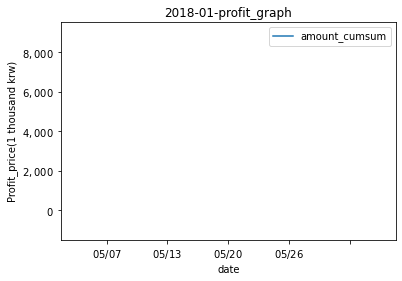

In [38]:
# 그래프 생성 및 저장
profit_graph1=cumsum_df_zero_point1[['amount_cumsum']].plot(title='2018-01-profit_graph')
profit_graph1.set_xlabel('date')
profit_graph1.set_ylabel('Profit_price(1 thousand krw)')
profit_graph1.set_yticklabels(['$0$', '$0$','$2,000$','$4,000$','$6,000$','$8,000$','$10,000$', '$12,000$'])
profit_graph1.set_xticklabels(['$0$', '$05/07$', '$05/13$', '$05/20$', '$05/26$'])
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/profit/2018-01-profit_graph.png', dpi=300)

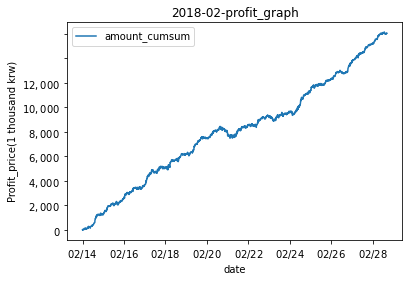

In [41]:
profit_graph2=cumsum_df_zero_point2[['amount_cumsum']].plot(title='2018-02-profit_graph')
profit_graph2.set_xlabel('date')
profit_graph2.set_ylabel('Profit_price(1 thousand krw)')
profit_graph2.set_yticklabels(['$0$', '$0$','$2,000$','$4,000$','$6,000$','$8,000$','$10,000$', '$12,000$'])
profit_graph2.set_xticklabels(['$0$', '$02/14$', '$02/16$', '$02/18$', '$02/20$', '$02/22$', '$02/24$', '$02/26$', '$02/28$'])
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/profit/2018-02-profit_graph.png', dpi=300)

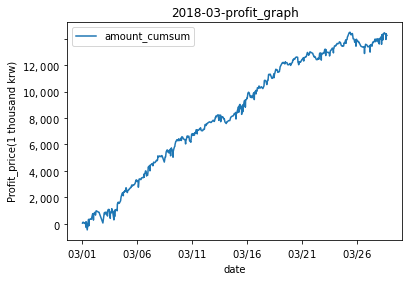

In [43]:
profit_graph3=cumsum_df_zero_point3[['amount_cumsum']].plot(title='2018-03-profit_graph')
profit_graph3.set_xlabel('date')
profit_graph3.set_ylabel('Profit_price(1 thousand krw)')
profit_graph3.set_yticklabels(['$0$', '$0$','$2,000$','$4,000$','$6,000$','$8,000$','$10,000$', '$12,000$'])
profit_graph3.set_xticklabels(['$0$', '$03/01$', '$03/06$', '$03/11$', '$03/16$', '$03/21$', '$03/26$'])
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/profit/2018-03-profit_graph.png', dpi=300)

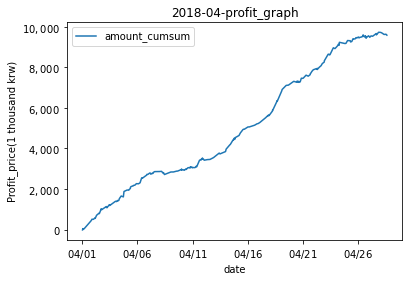

In [44]:
profit_graph4=cumsum_df_zero_point4[['amount_cumsum']].plot(title='2018-04-profit_graph')
profit_graph4.set_xlabel('date')
profit_graph4.set_ylabel('Profit_price(1 thousand krw)')
profit_graph4.set_yticklabels(['$0$', '$0$','$2,000$','$4,000$','$6,000$','$8,000$','$10,000$', '$12,000$'])
profit_graph4.set_xticklabels(['$0$', '$04/01$', '$04/06$', '$04/11$', '$04/16$', '$04/21$', '$04/26$'])
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/profit/2018-04-profit_graph.png', dpi=300)

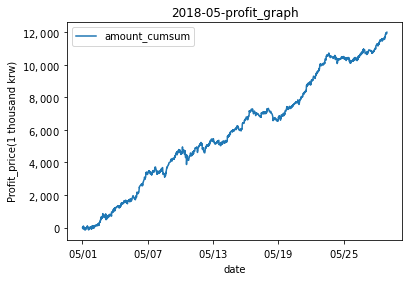

In [46]:
profit_graph5=cumsum_df_zero_point5[['amount_cumsum']].plot(title='2018-05-profit_graph')
profit_graph5.set_xlabel('date')
profit_graph5.set_ylabel('Profit_price(1 thousand krw)')
profit_graph5.set_yticklabels(['$0$', '$0$','$2,000$','$4,000$','$6,000$','$8,000$','$10,000$', '$12,000$'])
profit_graph5.set_xticklabels(['$0$', '$05/01$', '$05/07$', '$05/13$', '$05/19$', '$05/25$'])
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/profit/2018-05-profit_graph.png', dpi=300)

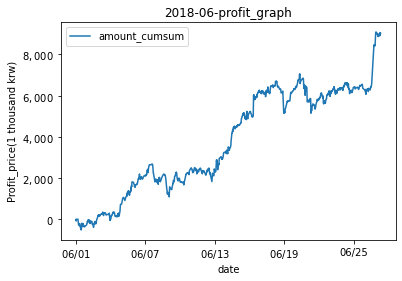

In [47]:
profit_graph6=cumsum_df_zero_point6[['amount_cumsum']].plot(title='2018-06-profit_graph')
profit_graph6.set_xlabel('date')
profit_graph6.set_ylabel('Profit_price(1 thousand krw)')
profit_graph6.set_yticklabels(['$0$', '$0$','$2,000$','$4,000$','$6,000$','$8,000$','$10,000$', '$12,000$'])
profit_graph6.set_xticklabels(['$0$', '$06/01$', '$06/07$', '$06/13$', '$06/19$', '06/25'])
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/profit/2018-06-profit_graph.png', dpi=300)

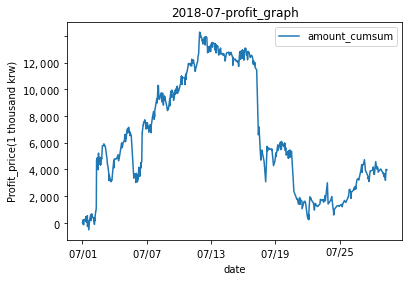

In [48]:
profit_graph7=cumsum_df_zero_point7[['amount_cumsum']].plot(title='2018-07-profit_graph')
profit_graph7.set_xlabel('date')
profit_graph7.set_ylabel('Profit_price(1 thousand krw)')
profit_graph7.set_yticklabels(['$0$', '$0$','$2,000$','$4,000$','$6,000$','$8,000$','$10,000$', '$12,000$'])
profit_graph7.set_xticklabels(['$0$', '$07/01$', '$07/07$', '$07/13$', '$07/19$', '07/25'])
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/profit/2018-07-profit_graph.png', dpi=300)

In [45]:
# 1월달 -> 0.01 : 0개
cumsum_df_zero_point1

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,compare,point_amount_cumsum


In [46]:
# 2월달 -> 0.01 : 3159개, 
cumsum_df_zero_point2

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,compare,point_amount_cumsum
1,2018-02-14 00:12:12,0.7990,9854000,0.0,7873346,1,0.7990,0.000000,-5593,0.0,-5593.0
3,2018-02-14 00:15:41,0.1050,9860000,0.0,1035300,1,0.1050,0.000000,-4438,-5593.0,1155.0
6,2018-02-14 00:20:44,0.3015,9882000,0.0,2979423,1,0.3015,-0.000000,28864,-4438.0,33302.0
14,2018-02-14 00:28:28,0.2978,9825000,0.0,2925885,1,0.2978,-0.000000,519,28864.0,-28345.0
19,2018-02-14 00:33:24,0.4805,9804000,0.0,4710822,1,0.4805,-0.000000,-16492,519.0,-17011.0
...,...,...,...,...,...,...,...,...,...,...,...
18325,2018-02-28 23:01:28,1.2093,11837000,0.0,14314484,1,1.2093,-0.000066,19994386,20028370.0,-33984.0
18334,2018-02-28 23:06:56,0.0154,11838000,0.0,182305,1,0.0154,-0.000066,19995067,19994386.0,681.0
18349,2018-02-28 23:25:17,0.2085,11884000,0.0,2477814,1,0.2085,-0.000056,20077412,19995067.0,82345.0
18365,2018-02-28 23:59:49,0.5662,11923000,0.0,6750803,1,0.5662,-0.000280,20055060,20077412.0,-22352.0


In [47]:
# 3월달 -> 0.01 : 835개
cumsum_df_zero_point3

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,compare,point_amount_cumsum
8,2018-03-01 00:12:48,0.1088,11936000,0,1298637,1,0.1088,0.000000,10680,0.0,10680.0
11,2018-03-01 00:23:31,1.8867,11958000,0,22561159,1,1.8867,0.000000,22094,10680.0,11414.0
14,2018-03-01 00:28:20,0.0493,11958000,0,589529,1,0.0493,0.000000,21961,22094.0,-133.0
18,2018-03-01 00:40:55,0.2514,11919000,0,2996437,1,0.2514,0.000000,28120,21961.0,6159.0
20,2018-03-01 00:41:51,0.0416,11910000,0,495456,1,0.0416,0.000000,28078,28120.0,-42.0
...,...,...,...,...,...,...,...,...,...,...,...
5531,2018-03-05 22:30:23,0.4172,12577000,0,5247124,1,0.4172,0.000044,3596321,3594120.0,2201.0
5534,2018-03-05 22:44:24,0.6380,12586000,0,8029868,1,0.6380,0.000044,3594407,3596321.0,-1914.0
5535,2018-03-05 22:49:34,0.0085,12585000,0,-106973,0,-0.0085,-0.008453,3487434,3594407.0,-106973.0
5536,2018-03-05 22:53:00,0.0085,12570000,0,106845,1,0.0085,0.000044,3594279,3487434.0,106845.0


In [48]:
# 4월달 -> 0.01 : 266개
cumsum_df_zero_point4

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,compare,point_amount_cumsum
23,2018-04-01 00:24:41,0.1082,7779000,0,-841688,0,-0.1082,-0.009048,-38857,0.0,-38857.0
44,2018-04-01 00:46:09,0.0289,7763000,0,224351,1,0.0289,0.006653,108525,-38857.0,147382.0
53,2018-04-01 00:59:44,0.1039,7753000,0,-805537,0,-0.1039,0.008354,124891,108525.0,16366.0
54,2018-04-01 00:59:51,0.0046,7757000,0,-35682,0,-0.0046,0.003752,89209,124891.0,-35682.0
156,2018-04-01 07:53:19,0.0533,7716000,0,411263,1,0.0533,-0.008904,83842,89209.0,-5367.0
...,...,...,...,...,...,...,...,...,...,...,...
27168,2018-04-30 00:52:05,0.1345,10127000,0,-1362082,0,-0.1345,0.005981,24238779,24305620.0,-66841.0
27367,2018-04-30 12:19:34,0.1481,10235000,0,-1515804,0,-0.1481,-0.007580,24054608,24238779.0,-184171.0
27542,2018-04-30 16:43:32,0.1338,10062000,0,-1346296,0,-0.1338,-0.003971,24083443,24054608.0,28835.0
27543,2018-04-30 16:43:42,0.0026,10061000,0,-26159,0,-0.0026,-0.006569,24057284,24083443.0,-26159.0


In [49]:
# 5월달 -> 0.01 : 2939개
cumsum_df_zero_point5

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,compare,point_amount_cumsum
6,2018-05-01 01:08:09,0.1672,10159000,0,1698585,1,0.1672,-0.000000,-2818,0.0,-2818.0
30,2018-05-01 02:01:00,0.4148,10158000,0,4213538,1,0.4148,0.000000,-8000,-2818.0,-5182.0
31,2018-05-01 02:28:32,0.0060,10190000,0,-61140,0,-0.0060,-0.006001,-69140,-8000.0,-61140.0
32,2018-05-01 02:30:41,0.0060,10183000,0,61098,1,0.0060,0.000000,-8042,-69140.0,61098.0
37,2018-05-01 03:28:58,0.2518,10191000,0,2566094,1,0.2518,0.000000,-2977,-8042.0,5065.0
...,...,...,...,...,...,...,...,...,...,...,...
23249,2018-05-31 21:09:12,0.0995,8300000,0,825850,1,0.0995,-0.000022,11947629,11947928.0,-299.0
23255,2018-05-31 21:44:25,0.1053,8306000,0,874622,1,0.1053,-0.000022,11928761,11947629.0,-18868.0
23269,2018-05-31 22:14:32,1.1890,8269000,0,9831841,1,1.1890,-0.000022,11908234,11928761.0,-20527.0
23286,2018-05-31 22:42:15,0.6208,8320000,0,5165056,1,0.6208,-0.000022,11990970,11908234.0,82736.0


In [50]:
# 6월달 -> 0.01 : 1248개
cumsum_df_zero_point6

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,compare,point_amount_cumsum
6,2018-06-01 02:00:45,0.1122,8327000,0,934289,1,0.1122,-0.000000,-702,0.0,-702.0
7,2018-06-01 02:05:02,0.0045,8318000,0,-37431,0,-0.0045,-0.004501,-38133,-702.0,-37431.0
8,2018-06-01 02:05:54,0.0045,8333000,0,37499,1,0.0045,-0.000000,-634,-38133.0,37499.0
13,2018-06-01 03:43:16,0.2233,8317000,0,1857186,1,0.2233,0.000000,-5373,-634.0,-4739.0
57,2018-06-01 06:02:29,0.1720,8313000,0,1429836,1,0.1720,-0.000000,8497,-5373.0,13870.0
...,...,...,...,...,...,...,...,...,...,...,...
8766,2018-06-30 21:43:31,0.2699,7188000,0,1940041,1,0.2699,-0.000052,4516977,4455807.0,61170.0
8769,2018-06-30 21:53:26,0.0282,7170000,0,202194,1,0.0282,-0.000052,4517095,4516977.0,118.0
8770,2018-06-30 23:04:48,0.0056,7150000,0,-40040,0,-0.0056,-0.005653,4477055,4517095.0,-40040.0
8775,2018-06-30 23:07:17,0.4041,7142000,0,2886082,1,0.4041,-0.000052,4513786,4477055.0,36731.0


In [51]:
# 7월달 -> 0.01 : 941개
cumsum_df_zero_point7

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,compare,point_amount_cumsum
1,2018-07-01 02:05:54,0.0750,7112000,0,533400,1,0.0750,0.000000,225,0.0,225.0
4,2018-07-01 02:46:33,0.0775,7094000,0,549785,1,0.0775,0.000000,225,225.0,0.0
5,2018-07-01 03:42:06,0.0001,7083000,0,-708,0,-0.0001,-0.000100,-483,225.0,-708.0
9,2018-07-01 05:40:53,0.1181,7125000,0,841463,1,0.1181,0.000000,3665,-483.0,4148.0
12,2018-07-01 05:57:11,0.6369,7121000,0,4535365,1,0.6369,0.000000,8123,3665.0,4458.0
...,...,...,...,...,...,...,...,...,...,...,...
9453,2018-07-16 23:55:40,1.1311,7375000,0,8341863,1,1.1311,-0.000010,493203,498397.0,-5194.0
9455,2018-07-16 23:56:53,0.0300,7380000,0,221400,1,0.0300,-0.000010,493263,493203.0,60.0
9460,2018-07-16 23:58:55,0.1091,7384000,0,805594,1,0.1091,0.000005,493806,493263.0,543.0
9464,2018-07-17 00:00:03,0.3153,7385000,0,2328491,1,0.3153,0.000005,494122,493806.0,316.0


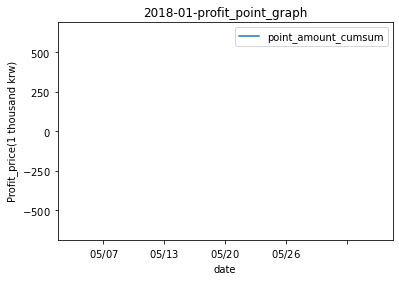

In [52]:
profit_point_graph1=cumsum_df_zero_point1[['point_amount_cumsum']].plot(title='2018-01-profit_point_graph')
profit_point_graph1.set_xlabel('date')
profit_point_graph1.set_ylabel('Profit_price(1 thousand krw)')
profit_point_graph1.set_yticklabels(['$0$', '$-500$', '$-250$','$0$','$250$','$500$','$750$','$1,000$', '$1,250$', '$1,500$'])
profit_point_graph1.set_xticklabels(['$0$', '$05/07$', '$05/13$', '$05/20$', '$05/26$'])
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/2018-01-profit_point_graph.png', dpi=300)

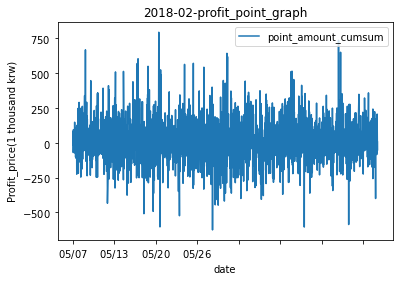

In [53]:
profit_point_graph2=cumsum_df_zero_point2[['point_amount_cumsum']].plot(title='2018-02-profit_point_graph')
profit_point_graph2.set_xlabel('date')
profit_point_graph2.set_ylabel('Profit_price(1 thousand krw)')
profit_point_graph2.set_yticklabels(['$0$', '$-500$', '$-250$','$0$','$250$','$500$','$750$','$1,000$', '$1,250$', '$1,500$'])
profit_point_graph2.set_xticklabels(['$0$', '$05/07$', '$05/13$', '$05/20$', '$05/26$'])
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/2018-02-profit_point_graph.png', dpi=300)

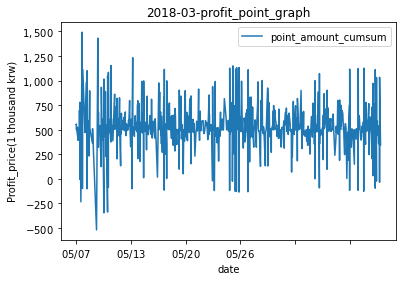

In [54]:
profit_point_graph3=cumsum_df_zero_point3[['point_amount_cumsum']].plot(title='2018-03-profit_point_graph')
profit_point_graph3.set_xlabel('date')
profit_point_graph3.set_ylabel('Profit_price(1 thousand krw)')
profit_point_graph3.set_yticklabels(['$0$', '$-500$', '$-250$','$0$','$250$','$500$','$750$','$1,000$', '$1,250$', '$1,500$'])
profit_point_graph3.set_xticklabels(['$0$', '$05/07$', '$05/13$', '$05/20$', '$05/26$'])
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/2018-03-profit_point_graph.png', dpi=300)

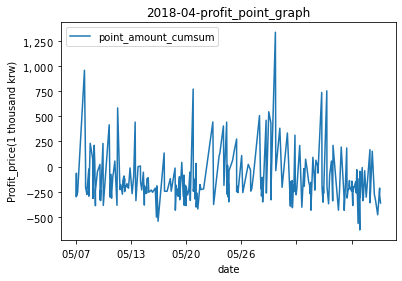

In [55]:
profit_point_graph4=cumsum_df_zero_point4[['point_amount_cumsum']].plot(title='2018-04-profit_point_graph')
profit_point_graph4.set_xlabel('date')
profit_point_graph4.set_ylabel('Profit_price(1 thousand krw)')
profit_point_graph4.set_yticklabels(['$0$', '$-500$', '$-250$','$0$','$250$','$500$','$750$','$1,000$', '$1,250$', '$1,500$'])
profit_point_graph4.set_xticklabels(['$0$', '$05/07$', '$05/13$', '$05/20$', '$05/26$'])
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/2018-04-profit_point_graph.png', dpi=300)

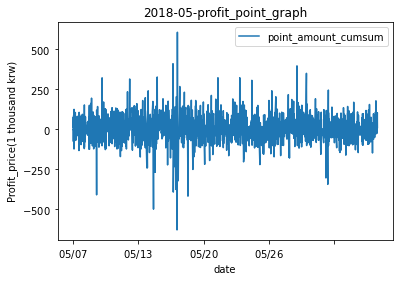

In [56]:
profit_point_graph5=cumsum_df_zero_point5[['point_amount_cumsum']].plot(title='2018-05-profit_point_graph')
profit_point_graph5.set_xlabel('date')
profit_point_graph5.set_ylabel('Profit_price(1 thousand krw)')
profit_point_graph5.set_yticklabels(['$0$', '$-500$', '$-250$','$0$','$250$','$500$','$750$','$1,000$', '$1,250$', '$1,500$'])
profit_point_graph5.set_xticklabels(['$0$', '$05/07$', '$05/13$', '$05/20$', '$05/26$'])
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/2018-05-profit_point_graph.png', dpi=300)

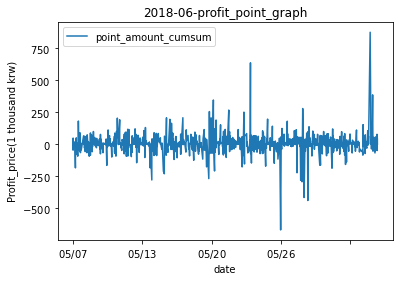

In [57]:
profit_point_graph6=cumsum_df_zero_point6[['point_amount_cumsum']].plot(title='2018-06-profit_point_graph')
profit_point_graph6.set_xlabel('date')
profit_point_graph6.set_ylabel('Profit_price(1 thousand krw)')
profit_point_graph6.set_yticklabels(['$0$', '$-500$', '$-250$','$0$','$250$','$500$','$750$','$1,000$', '$1,250$', '$1,500$'])
profit_point_graph6.set_xticklabels(['$0$', '$05/07$', '$05/13$', '$05/20$', '$05/26$'])
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/2018-06-profit_point_graph.png', dpi=300)

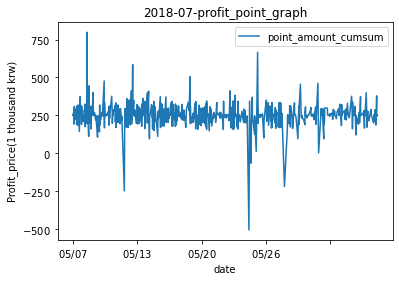

In [58]:
profit_point_graph7=cumsum_df_zero_point7[['point_amount_cumsum']].plot(title='2018-07-profit_point_graph')
profit_point_graph7.set_xlabel('date')
profit_point_graph7.set_ylabel('Profit_price(1 thousand krw)')
profit_point_graph7.set_yticklabels(['$0$', '$-500$', '$-250$','$0$','$250$','$500$','$750$','$1,000$', '$1,250$', '$1,500$'])
profit_point_graph7.set_xticklabels(['$0$', '$05/07$', '$05/13$', '$05/20$', '$05/26$'])
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/2018-07-profit_point_graph.png', dpi=300)

In [59]:
# 테이블 저장
cumsum_df_zero_point1.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-01-profit_table.csv", header=True, index=True, encoding = 'utf-8')
cumsum_df_zero_point2.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-02-profit_table.csv", header=True, index=True, encoding = 'utf-8')
cumsum_df_zero_point3.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-03-profit_table.csv", header=True, index=True, encoding = 'utf-8')
cumsum_df_zero_point4.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-04-profit_table.csv", header=True, index=True, encoding = 'utf-8')
cumsum_df_zero_point5.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-05-profit_table.csv", header=True, index=True, encoding = 'utf-8')
cumsum_df_zero_point6.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-06-profit_table.csv", header=True, index=True, encoding = 'utf-8')
cumsum_df_zero_point7.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-07-profit_table.csv", header=True, index=True, encoding = 'utf-8')

In [60]:
# 시간 - profit 누적 테이블 생성
profit_graph_table1=cumsum_df_zero_point1[['timestamp', 'amount_cumsum']]
profit_graph_table2=cumsum_df_zero_point2[['timestamp', 'amount_cumsum']]
profit_graph_table3=cumsum_df_zero_point3[['timestamp', 'amount_cumsum']]
profit_graph_table4=cumsum_df_zero_point4[['timestamp', 'amount_cumsum']]
profit_graph_table5=cumsum_df_zero_point5[['timestamp', 'amount_cumsum']]
profit_graph_table6=cumsum_df_zero_point6[['timestamp', 'amount_cumsum']]
profit_graph_table7=cumsum_df_zero_point7[['timestamp', 'amount_cumsum']]

In [61]:
# time - profit 누적 테이블 저장
profit_graph_table1.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-01-profit_graph_table.csv", header=True, index=True, encoding = 'utf-8')
profit_graph_table2.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-02-profit_graph_table.csv", header=True, index=True, encoding = 'utf-8')
profit_graph_table3.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-03-profit_graph_table.csv", header=True, index=True, encoding = 'utf-8')
profit_graph_table4.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-04-profit_graph_table.csv", header=True, index=True, encoding = 'utf-8')
profit_graph_table5.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-05-profit_graph_table.csv", header=True, index=True, encoding = 'utf-8')
profit_graph_table6.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-06-profit_graph_table.csv", header=True, index=True, encoding = 'utf-8')
profit_graph_table7.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-07-profit_graph_table.csv", header=True, index=True, encoding = 'utf-8')

In [62]:
# time - 구간 별 profit 테이블 생성
profit_point_graph_table1=cumsum_df_zero_point1[['timestamp', 'point_amount_cumsum']]
profit_point_graph_table2=cumsum_df_zero_point2[['timestamp', 'point_amount_cumsum']]
profit_point_graph_table3=cumsum_df_zero_point3[['timestamp', 'point_amount_cumsum']]
profit_point_graph_table4=cumsum_df_zero_point4[['timestamp', 'point_amount_cumsum']]
profit_point_graph_table5=cumsum_df_zero_point5[['timestamp', 'point_amount_cumsum']]
profit_point_graph_table6=cumsum_df_zero_point6[['timestamp', 'point_amount_cumsum']]
profit_point_graph_table7=cumsum_df_zero_point7[['timestamp', 'point_amount_cumsum']]

In [63]:
# time - 구간 별 profit 테이블 저장
profit_point_graph_table1.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-01-profit_point_graph_table.csv", header=True, index=True, encoding = 'utf-8')
profit_point_graph_table2.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-02-profit_point_graph_table.csv", header=True, index=True, encoding = 'utf-8')
profit_point_graph_table3.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-03-profit_point_graph_table.csv", header=True, index=True, encoding = 'utf-8')
profit_point_graph_table4.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-04-profit_point_graph_table.csv", header=True, index=True, encoding = 'utf-8')
profit_point_graph_table5.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-05-profit_point_graph_table.csv", header=True, index=True, encoding = 'utf-8')
profit_point_graph_table6.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-06-profit_point_graph_table.csv", header=True, index=True, encoding = 'utf-8')
profit_point_graph_table7.to_csv("/Users/hamin/bithumb_bot/hamin_code/table/2018-07-profit_point_graph_table.csv", header=True, index=True, encoding = 'utf-8')

In [64]:
cumsum_df_zero_point2

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,compare,point_amount_cumsum
1,2018-02-14 00:12:12,0.7990,9854000,0.0,7873346,1,0.7990,0.000000,-5593,0.0,-5593.0
3,2018-02-14 00:15:41,0.1050,9860000,0.0,1035300,1,0.1050,0.000000,-4438,-5593.0,1155.0
6,2018-02-14 00:20:44,0.3015,9882000,0.0,2979423,1,0.3015,-0.000000,28864,-4438.0,33302.0
14,2018-02-14 00:28:28,0.2978,9825000,0.0,2925885,1,0.2978,-0.000000,519,28864.0,-28345.0
19,2018-02-14 00:33:24,0.4805,9804000,0.0,4710822,1,0.4805,-0.000000,-16492,519.0,-17011.0
...,...,...,...,...,...,...,...,...,...,...,...
18325,2018-02-28 23:01:28,1.2093,11837000,0.0,14314484,1,1.2093,-0.000066,19994386,20028370.0,-33984.0
18334,2018-02-28 23:06:56,0.0154,11838000,0.0,182305,1,0.0154,-0.000066,19995067,19994386.0,681.0
18349,2018-02-28 23:25:17,0.2085,11884000,0.0,2477814,1,0.2085,-0.000056,20077412,19995067.0,82345.0
18365,2018-02-28 23:59:49,0.5662,11923000,0.0,6750803,1,0.5662,-0.000280,20055060,20077412.0,-22352.0
